In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn import metrics
import joblib


In [2]:
iris = datasets.load_iris()

In [3]:
data=pd.DataFrame({
    'sepal_length':iris.data[:,0],
    'sepal_width':iris.data[:,1],
    'petal_length':iris.data[:,2],
    'petal_width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [5]:
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y=data['species'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9333333333333333


In [9]:
clf

RandomForestClassifier()

In [10]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.520707
petal length (cm)    0.342482
sepal length (cm)    0.115215
sepal width (cm)     0.021596
dtype: float64

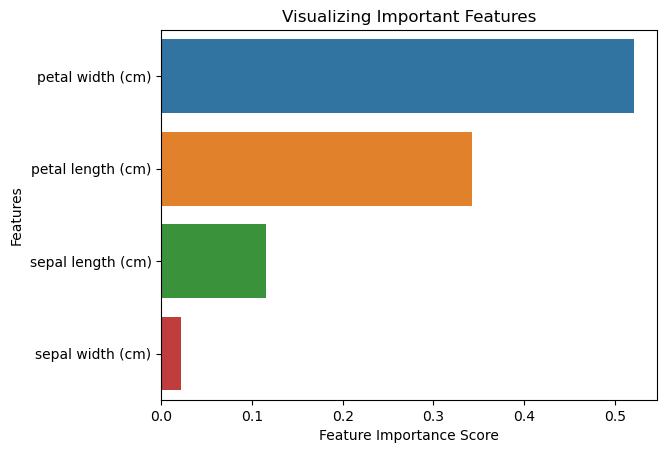

In [11]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [12]:
X=data[['petal_length', 'petal_width']] 
y=data['species']                                       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [13]:
clf_sf=RandomForestClassifier(n_estimators=100)
clf_sf.fit(X_train,y_train)
y_pred=clf_sf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


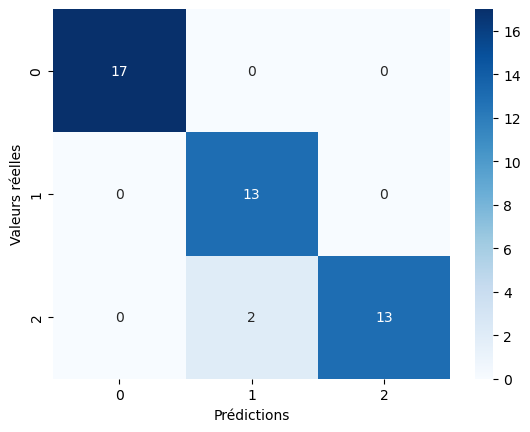

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      1.00      0.93        13
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [31]:
#save weights 
joblib.dump((clf_sf), "irisclass.joblib.z")

['irisclass.joblib.z']

In [29]:
y_res = clf_sf.predict([[1.2, 0.3]])
# ['setosa', 'versicolor', 'virginica']

D:\Programmation\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
y_res

array([0])

In [32]:
float("5.2")

5.2